In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import glob
import matplotlib.pyplot as plt
from scipy.stats import ranksums
import seaborn as sns
import numpy as np
from sklearn import metrics
from numpy.random import randn
from numpy.random import seed
from numpy import mean
from numpy import var
from math import sqrt
import numpy as np
#!pip install scikit-posthocs
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
def delete_multiple_element(list_object, indices):
    indices = sorted(indices, reverse=True)
    for idx in indices:
        if idx < len(list_object):
            list_object.pop(idx)
            
    return list_object


In [3]:
def holm_correction(kruskal):
    line_to_remove=[]
    values=[]
    corrected =[]
    final = []
    for l in kruskal:
        if "nan" in l:
            line_to_remove.append(kruskal.index(l))
    
    new_krusk = delete_multiple_element(kruskal, line_to_remove)
            
    for line in new_krusk:
        ok = line.split('vs.')[1]
        num = ok.split(" ")[2]
        values.append(float(num))
   # values = [x for x in values if isnan(x) == False]
    result = statsmodels.stats.multitest.fdrcorrection(values, alpha=0.05, method='indep', is_sorted=False)
    num = np.where(result[0] == True)
    list_index = ((num)[0]).tolist()

    for i in list_index:
        corrected.append(result[1][i])
    for i in list_index:
        final.append(kruskal[i])
    
    return final, corrected
    
    
    #return values
#val = np.array(values)
    #return statsmodels.stats.multitest.fdrcorrection(values, alpha=0.05, method='indep', is_sorted=False)

In [4]:
def read_stats_test(file):
    
    with open(file, 'r') as f:
        lista = []
        testo = f.readlines()
        testo = [line.strip("\n") for line in testo]

        for line in testo:
            if line=="":
                pass
            else:
                lista.append(line)
                
    return lista

In [5]:
def compute_best_scores(lista):    

    values = []
    critical = []
    final = [] 
    
    for l in lista:
        ok = l.split('vs.')[1]
        num = ok.split(" ")[2]
        values.append(num)

    for value in values:
        if float(value) < 0.05:
            critical.append(value)

    for li in lista:
        for cri in critical:
            if cri in li:
                final.append(li)

    return final

In [6]:
#path = '/export/c12/afavaro/Alignment/firstwordalignment_6209.txt'

path = '/export/c12/afavaro/Alignment/firstwordalignment_tot_21august.txt'
#path = '/export/c12/afavaro/Alignment/firstwordalignment_6209_updated.txt' SLT 
path

'/export/c12/afavaro/Alignment/firstwordalignment_tot_21august.txt'

In [7]:
data = pd.read_csv(path,sep=" ", header=None)
data.columns = ["subject", "RT"] #CTP
#len(data.subject.tolist())



In [8]:
all_ = data['subject'].tolist()

In [9]:
participants = []
tasks = []

for every in all_:
    participant = every.split("_ses")[0]
    participants.append(participant)
    if "ses1" in every:
        print(every)
        task = every.split("ses1_")[1]
        task = task.split("-16k.wav")[0]
        tasks.append(task)
    if "ses2" in every:
       # print(every)
        task = every.split("ses2_")[1]
        task = task.split("-16k.wav")[0]
        tasks.append(task)
    if "ses3" in every:
       # print(every)
        task = every.split("ses3_")[1]
        task = task.split("-16k.wav")[0]
        tasks.append(task)


PEC_59_ses1_Prosac_Vigor_5-16k.wav
PEC_57_ses1_Naming_object_5-16k.wav
PEC_60_ses1_SmoothSustained_1-16k.wav
PEC_55_ses1_Naming_action_4-16k.wav
PEC_55_ses1_SmoothSustained_2-16k.wav
PEC_55_ses1_Naming_object_6-16k.wav
PEC_57_ses1_Prosac_Vigor_6-16k.wav
PEC_57_ses1_SmoothSustained_4-16k.wav
PEC_60_ses1_Red_Green-16k.wav
PEC_55_ses1_Naming_object_2-16k.wav
PEC_55_ses1_Joke-16k.wav
PEC_57_ses1_WordColor-16k.wav
PEC_55_ses1_Secuence_stroop_Previous_2-16k.wav
PEC_60_ses1_SmoothSustained_2-16k.wav
PEC_57_ses1_Naming_action_3-16k.wav
PEC_55_ses1_Naming_action_3-16k.wav
PEC_55_ses1_SmoothSustained_4-16k.wav
PEC_57_ses1_Prosac_Vigor_2-16k.wav
PEC_60_ses1_RainbowPassage-16k.wav
PEC_57_ses1_SmoothSustained_6-16k.wav
PEC_55_ses1_Prosac_Vigor_5-16k.wav
PEC_55_ses1_Naming_action_10-16k.wav
PEC_55_ses1_SmoothSustained_1-16k.wav
PEC_60_ses1_WordColor-16k.wav
PEC_60_ses1_Naming_action_4-16k.wav
PEC_55_ses1_Prosac_Vigor_7-16k.wav
PEC_57_ses1_Naming_object_6-16k.wav
PEC_59_ses1_Prosac_Vigor_8-16k.wav
PE

In [10]:
#len(tasks)

In [11]:
data['Task'] = tasks
data['idx'] = participants

In [12]:
label_seneca = pd.read_excel("/export/b14/afavaro/Acoustic_Features/DigiPsych_Prosody/Hospital_Analysis/Book3.xlsx")
label = label_seneca['Label'].tolist()
speak = label_seneca['Participant I.D.'].tolist()
spk2lab_ = {sp:lab for sp,lab in zip(speak,label)}
speak2__ = data['idx'].tolist()

In [13]:
etichettex = []
for nome in speak2__:
    if nome in spk2lab_.keys():
        lav = spk2lab_[nome]
        etichettex.append(([nome, lav]))
    else:
         etichettex.append(([nome, 'Unknown']))

In [14]:
label_new_ = []
for e in etichettex:
    label_new_.append(e[1])
data['label'] = label_new_

In [15]:
data

,subject,RT,Task,idx,label
0,NLS_118_ses2_SmoothSustained_2-16k.wav,0.834,SmoothSustained_2,NLS_118,Unknown
1,PEC_59_ses1_Prosac_Vigor_5-16k.wav,3.906,Prosac_Vigor_5,PEC_59,Unknown
2,NLS_118_ses2_Naming_object_8-16k.wav,1.026,Naming_object_8,NLS_118,Unknown
3,NLS_3_ses2_Naming_object_6-16k.wav,1.986,Naming_object_6,NLS_3,ATX
4,PEC_57_ses1_Naming_object_5-16k.wav,1.314,Naming_object_5,PEC_57,Unknown
...,...,...,...,...,...
7514,AD_14_ses1_Naming_object_10-16k.wav,1.41,Naming_object_10,AD_14,AD
7515,AD_14_ses1_SmoothSustained_2-16k.wav,0.642,SmoothSustained_2,AD_14,AD
7516,AD_14_ses1_Prosac_Vigor_7-16k.wav,None,Prosac_Vigor_7,AD_14,AD
7517,AD_14_ses1_Prosac_Vigor_5-16k.wav,4.002,Prosac_Vigor_5,AD_14,AD


In [16]:
#data.dropna(axis=1,inplace=True)

In [19]:
data = data[data['RT'] != 'None']

In [23]:
data.to_csv("/export/b14/afavaro/Reaction_Time_helin.csv")

In [80]:
task_grouped_= data.groupby('Task')
seq2prev2 = task_grouped_.get_group("Secuence_stroop_Previous_2")
seq2prev1 = task_grouped_.get_group("Secuence_stroop_Previous_1")
word_color = task_grouped_.get_group("WordColor")
cookie_thief = task_grouped_.get_group("CookieThief")
rainbow_pass = task_grouped_.get_group("RainbowPassage") 

seq2prev1.reset_index(drop=True, inplace=True)
seq2prev2.reset_index(drop=True, inplace=True)
word_color.reset_index(drop=True, inplace=True) 
cookie_thief.reset_index(drop=True, inplace=True)

In [81]:
cookie_thief

,subject,RT [ms]\nCTP task (NLS),Task,idx,label
0,PEC_31_ses1_CookieThief-16k.wav,2.754,CookieThief,PEC_31,CTRL
1,PEC_34_ses1_CookieThief-16k.wav,3.426,CookieThief,PEC_34,CTRL
2,PEC_28_ses1_CookieThief-16k.wav,2.466,CookieThief,PEC_28,CTRL
3,PEC_29_ses1_CookieThief-16k.wav,1.89,CookieThief,PEC_29,CTRL
4,PEC_3_ses1_CookieThief-16k.wav,1.986,CookieThief,PEC_3,CTRL
...,...,...,...,...,...
127,AD_9_ses1_CookieThief-16k.wav,3.042,CookieThief,AD_9,AD
128,NLS_7_ses3_CookieThief-16k.wav,2.082,CookieThief,NLS_7,PD
129,AD_8_ses1_CookieThief-16k.wav,2.178,CookieThief,AD_8,AD
130,PEC_49_ses1_CookieThief-16k.wav,2.082,CookieThief,PEC_49,Unknown


In [82]:
#cookie_thief.to_csv('/export/b14/afavaro/SLT_submission/cognitive/rt_ctp.csv', index=False)

### COOKIE THIEF 

In [83]:
grouped = cookie_thief.groupby("label") #here we extract the values by category

control = grouped.get_group("CTRL") 
parkinson_ = grouped.get_group("PD")
alzheimer =  grouped.get_group("AD")
#ataxia =  grouped.get_group("ATX")


others =  pd.concat([ grouped.get_group('CBS'),  
                     grouped.get_group('ET'), grouped.get_group('GSS'), grouped.get_group('WD'), 
                      grouped.get_group('PSP'), grouped.get_group('MIM')])

#grouped.get_group('SCZ')


In [84]:
parkinson_ = parkinson_[~parkinson_.idx.str.contains("NLS_102")]
parkinson_ = parkinson_[~parkinson_.idx.str.contains("NLS_98")]
parkinson_ = parkinson_[~parkinson_.idx.str.contains("NLS_95")]
parkinson_ = parkinson_[~parkinson_.idx.str.contains("NLS_87")]
parkinson_ = parkinson_[~parkinson_.idx.str.contains("NLS_85")]
parkinson_ = parkinson_[~parkinson_.idx.str.contains("NLS_57")]
parkinson_ = parkinson_[~parkinson_.idx.str.contains("NLS_34")]
parkinson_ = parkinson_[~parkinson_.idx.str.contains("NLS_33")]
parkinson_ = parkinson_[~parkinson_.idx.str.contains("NLS_12")]
parkinson_ = parkinson_[~parkinson_.idx.str.contains("NLS_21")]



az = (alzheimer['Reaction_Time'].tolist())
az = np.array([x for x in az if x !='None'])
az = az.astype(float)
ctrl =(control['Reaction_Time'].tolist())
ctrl = np.array([x for x in ctrl if x !='None'])
ctrl = ctrl.astype(float)
atx =(ataxia['Reaction_Time'].tolist())
atx = np.array([x for x in atx if x !='None'])
atx = atx.astype(float)
pd =(parkinson_['Reaction_Time'].tolist())
pd = np.array([x for x in pd if x !='None'])
pd = pd.astype(float)

otr =(others['Reaction_Time'].tolist())
otr= np.array([x for x in otr if x !='None'])
otr = pd.astype(float)


mean_atx = np.mean(atx)
st_atx = np.std(atx)
mean_az = np.mean(az)
st_ad = np.std(az)
mean_ctrl =  np.mean(ctrl)
st_ctrl = np.std(ctrl)

mean_otr = np.mean(otr)
st_otr = np.std(otr)

In [ ]:
#cohend(ctrl, atx)

In [ ]:
# function to calculate Cohen's d for independent samples
#compute effect size
from numpy.random import randn
from numpy.random import seed
from numpy import mean
from numpy import var
from math import sqrt
import numpy as np
import scipy.stats as st


def conf_interval(list_of_values):
    return st.t.interval(alpha=0.95, df=len(list_of_values)-1, loc=np.mean(list_of_values), scale=st.sem(list_of_values)) 
   

def cohend(d1, d2):
	# calculate the size of samples
	n1, n2 = len(d1), len(d2)
	# calculate the variance of the samples
	s1, s2 = var(d1, ddof=1), var(d2, ddof=1)
	# calculate the pooled standard deviation
	s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
	# calculate the means of the samples
	u1, u2 = mean(d1), mean(d2)
	# calculate the effect size
	return (u1 - u2) / s

## COOKIE THIEF PICTURE DESCRIPTION TASK

In [85]:
task = cookie_thief.columns[1:2].values.tolist()

alzheimer_all_feat = np.array([alzheimer[feat] for feat in np.array(cookie_thief.columns[1:2])])
others_all_feat = np.array([others[feat] for feat in np.array(cookie_thief.columns[1:2])])
parkinson_all_feat = np.array([parkinson_[feat] for feat in np.array(cookie_thief.columns[1:2])])
control_all_feat = np.array([control[feat] for feat in np.array(cookie_thief.columns[1:2])])
#ataxia_all_feat = np.array([ataxia[feat] for feat in np.array(cookie_thief.columns[1:2])])

#data = [alzheimer_all_feat, others_all_feat, parkinson_all_feat, control_all_feat, ataxia_all_feat]

## AUC

In [81]:
#print(ataxia.shape, control_all_feat.shape)
#alzheimer_all_feat = alzheimer_all_feat[alzheimer_all_feat != np.array('None')]
#control_all_feat = control_all_feat[control_all_feat != np.array('None')]
xs = np.concatenate([alzheimer_all_feat, control_all_feat],axis=1)

#print(xs.shape, y.shape)
#xs = xs[xs != np.array('None')]
#xs = xs.astype(float)

y = np.concatenate([alzheimer_all_feat.shape[1]*[2], control_all_feat.shape[1]*[1]])
for i, x in enumerate(xs):
#    xs[xs != np.array('None')]
    ind = x != np.array('None')
    fpr, tpr, thresholds = metrics.roc_curve(y[ind], x[ind].astype(float), pos_label=2)
    print(i, metrics.auc(fpr, tpr))

0 0.7566287878787878


In [74]:
def kruskal(f, task, c, p, c_name, p_name):
    for i, title in enumerate(task):
        nome = title
        f.write(('\n'+ f'kruskal results for {title} {c_name} {p_name} {stats.kruskal(c[i], p[i]).pvalue} \n\n'))
        
        

with open('/export/b14/afavaro/SLT_submission/cognitive/results/ry_cn_vs_pd.txt', 'w') as f:
 
    kruskal(f, task, control_all_feat, parkinson_all_feat, "controls vs.", "parkinson")
    

with open('/export/b14/afavaro/SLT_submission/cognitive/results/ry_cn_vs_otr.txt', 'w') as f:
    
    
    kruskal(f, task, control_all_feat, others_all_feat, "control vs.", "others")
    

with open('/export/b14/afavaro/SLT_submission/cognitive/results/ry_pd_vs_otr.txt', 'w') as f:
    
    
    kruskal(f, task, parkinson_all_feat, others_all_feat, "parkinson vs.", "others")
    

with open('/export/b14/afavaro/SLT_submission/cognitive/results/ry_ad_vs_otr.txt', 'w') as f:

    
    kruskal(f, task, alzheimer_all_feat, others_all_feat, "alzheimers vs.", "others")
    

with open('/export/b14/afavaro/SLT_submission/cognitive/results/ry_ad_vs_cn.txt', 'w') as f:
    #final_sub
    
    kruskal(f, task, alzheimer_all_feat, control_all_feat, "alzheimers vs.", "controls")
    

with open('/export/b14/afavaro/SLT_submission/cognitive/results/ry_ad_vs_pd.txt', 'w') as f:
    #final_sub
    
    kruskal(f, task, alzheimer_all_feat, parkinson_all_feat, "alzheimers vs.", "parkinson")
    

    

In [ ]:
kruskal_1 = read_stats_test('/export/b14/afavaro/SLT_submission/cognitive/results/ry_ad_vs_cn.txt')

kruskal_2 = read_stats_test('/export/b14/afavaro/SLT_submission/cognitive/results/ry_ad_vs_otr.txt')
kruskal_3 = read_stats_test('/export/b14/afavaro/SLT_submission/cognitive/results/ry_ad_vs_pd.txt')
kruskal_4 = read_stats_test('/export/b14/afavaro/SLT_submission/cognitive/results/ry_cn_vs_otr.txt')
kruskal_5 = read_stats_test('/export/b14/afavaro/SLT_submission/cognitive/results/ry_cn_vs_pd.txt')
kruskal_6 = read_stats_test('/export/b14/afavaro/SLT_submission/cognitive/results/ry_pd_vs_otr.txt')
#best_krusk = compute_best_scores(kruskal)


In [76]:
kruskal_1

['kruskal results for RT alzheimers vs. controls 0.006675968568923189 ']

In [71]:
kruskal_1

['kruskal results for RT alzheimers vs. controls 0.006675968568923189 ']

In [73]:
holm_correction(kruskal_1)

(['kruskal results for RT alzheimers vs. controls 0.006675968568923189 '],
 [0.006675968568923189])

In [3]:
#holm_correction(kruskal_2)

In [42]:
holm_correction(kruskal_3)

([], [])

In [43]:
holm_correction(kruskal_4)

([], [])

In [44]:
holm_correction(kruskal_5)

([], [])

In [45]:
holm_correction(kruskal_6)

([], [])

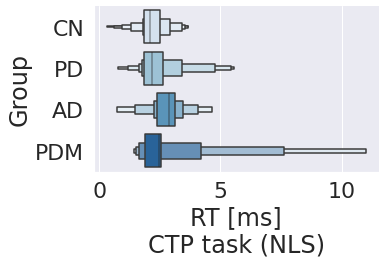

In [86]:
for i, title in enumerate(task):  
    
    nome = title
   
    controls = []
    parkinson=[]
    alz = []
    #ataxia = []
    others= []
    
    data = np.concatenate([control_all_feat[i], parkinson_all_feat[i], alzheimer_all_feat[i], others_all_feat[i]])
    data = data.tolist()
    data = [float(x) for x in data if x != "None"]


    [controls.append('CN') for value in range(len(control_all_feat[i]))]
    #[ataxia.append('ATX') for value in range(len(ataxia_all_feat[i]))]
    [parkinson.append('PD') for value in range(len(parkinson_all_feat[i]))]
    [alz.append('AD') for value in range(len(alzheimer_all_feat[i]))]
    [others.append('PDM') for value in range(len(others_all_feat[i]))]

    lista = controls+parkinson+alz+others
    
    dict = {nome: data, 'Group': lista} 
    df = pd.DataFrame(dict)
    #tips = pd.DataFrame()
    #tips['task'] = data
    #tips['lista'] = lista
    
    sns.set(font_scale=2)
    sns.catplot(x=nome, y="Group", kind="boxen", data=df, k_depth='full', palette="Blues",\
               height=4.2, aspect=1.4, showfliers = False)
    
    plt.savefig(f'/export/b14/afavaro/SLT_submission/Final_plot_SLT/{nome}', facecolor='white', dpi=600)

In [78]:
import numpy as np
from sklearn import metrics
import sklearn


def compute_auc(array_1, array_2):
    xs = np.concatenate([array_1, array_2],axis=0)
    y = np.concatenate([array_1.shape[1]*[2], array_2.shape[1]*[1]])
    
    for i, x in enumerate(xs):
        fpr, tpr, thresholds = metrics.roc_curve(y, x, pos_label=2)
        #print(i, metrics.auc(fpr, tpr))
        m = metrics.roc_auc_score(y, x)
        print(round(max(m, 1-m), 2))


In [4]:
#compute_auc(control_all_feat, alzheimer_all_feat)

### SEQUENCE TO PREVIOUS ONE 

In [48]:
grouped = seq2prev1.groupby("label") #here we extract the values by category

control = grouped.get_group("CTRL") 


parkinson_ = grouped.get_group("PD")
alzheimer =  grouped.get_group("AD")
#ataxia =  grouped.get_group("ATX")

others =  pd.concat([ grouped.get_group('CBS'),  
                     grouped.get_group('ET'), grouped.get_group('GSS'), grouped.get_group('WD'), 
                      grouped.get_group('PSP'), grouped.get_group('MIM')])

#grouped.get_group('SCZ')

#grouped.get_group('SCZ')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [49]:
parkinson_ = parkinson_[~parkinson_.idx.str.contains("NLS_102")]
parkinson_ = parkinson_[~parkinson_.idx.str.contains("NLS_98")]
parkinson_ = parkinson_[~parkinson_.idx.str.contains("NLS_95")]
parkinson_ = parkinson_[~parkinson_.idx.str.contains("NLS_87")]
parkinson_ = parkinson_[~parkinson_.idx.str.contains("NLS_85")]
parkinson_ = parkinson_[~parkinson_.idx.str.contains("NLS_57")]
parkinson_ = parkinson_[~parkinson_.idx.str.contains("NLS_34")]
parkinson_ = parkinson_[~parkinson_.idx.str.contains("NLS_33")]
parkinson_ = parkinson_[~parkinson_.idx.str.contains("NLS_12")]
parkinson_ = parkinson_[~parkinson_.idx.str.contains("NLS_21")]



In [50]:
task = seq2prev1.columns[1:2].values.tolist()

alzheimer_all_feat = np.array([alzheimer[feat] for feat in np.array(seq2prev1.columns[1:2])])
others_all_feat = np.array([others[feat] for feat in np.array(seq2prev1.columns[1:2])])
parkinson_all_feat = np.array([parkinson_[feat] for feat in np.array(seq2prev1.columns[1:2])])
control_all_feat = np.array([control[feat] for feat in np.array(seq2prev1.columns[1:2])])


#print(ataxia.shape, control_all_feat.shape)
#alzheimer_all_feat = alzheimer_all_feat[alzheimer_all_feat != np.array('None')]
#control_all_feat = control_all_feat[control_all_feat != np.array('None')]
xs = np.concatenate([alzheimer_all_feat, others_all_feat],axis=1)

#print(xs.shape, y.shape)
#xs = xs[xs != np.array('None')]
#xs = xs.astype(float)

y = np.concatenate([alzheimer_all_feat.shape[1]*[2], others_all_feat.shape[1]*[1]])
import numpy as np
from sklearn import metrics
for i, x in enumerate(xs):
#xs[xs != np.array('None')]
    ind = x != np.array('None')
    fpr, tpr, thresholds = metrics.roc_curve(y[ind], x[ind].astype(float), pos_label=2)
    print(i, metrics.auc(fpr, tpr))

In [51]:
#compute_auc(alzheimer_all_feat, control_all_feat)

In [52]:
def kruskal(f, task, c, p, c_name, p_name):
    for i, title in enumerate(task):
        nome = title
        f.write(('\n'+ f'kruskal results for {title} {c_name} {p_name} {stats.kruskal(c[i], p[i]).pvalue} \n\n'))

with open('/export/b14/afavaro/SLT_submission/cognitive/results/s2prev1_ry_cn_vs_pd.txt', 'w') as f:
 
    kruskal(f, task, control_all_feat, parkinson_all_feat, "controls vs.", "parkinson")

    

with open('/export/b14/afavaro/SLT_submission/cognitive/results/s2prev1_ry_cn_vs_otr.txt', 'w') as f:
    
    
    kruskal(f, task, control_all_feat, others_all_feat, "control vs.", "others")
    

with open('/export/b14/afavaro/SLT_submission/cognitive/results/s2prev1_ry_pd_vs_otr.txt', 'w') as f:
    
    
    kruskal(f, task, parkinson_all_feat, others_all_feat, "parkinson vs.", "others")
    

with open('/export/b14/afavaro/SLT_submission/cognitive/results/s2prev1_ry_ad_vs_otr.txt', 'w') as f:

    
    kruskal(f, task, alzheimer_all_feat, others_all_feat, "alzheimers vs.", "others")
    

with open('/export/b14/afavaro/SLT_submission/cognitive/results/s2prev1_ry_ad_vs_cn.txt', 'w') as f:
    #final_sub
    
    kruskal(f, task, alzheimer_all_feat, control_all_feat, "alzheimers vs.", "controls")
    

with open('/export/b14/afavaro/SLT_submission/cognitive/results/s2prev1_ry_ad_vs_pd.txt', 'w') as f:
    #final_sub
    
    kruskal(f, task, alzheimer_all_feat, parkinson_all_feat, "alzheimers vs.", "parkinson")


In [53]:
kruskal_1 = read_stats_test('/export/b14/afavaro/SLT_submission/cognitive/results/s2prev1_ry_ad_vs_cn.txt')
kruskal_2 = read_stats_test('/export/b14/afavaro/SLT_submission/cognitive/results/s2prev1_ry_ad_vs_otr.txt')
kruskal_3 = read_stats_test('/export/b14/afavaro/SLT_submission/cognitive/results/s2prev1_ry_ad_vs_pd.txt')
kruskal_4 = read_stats_test('/export/b14/afavaro/SLT_submission/cognitive/results/s2prev1_ry_cn_vs_otr.txt')
kruskal_5 = read_stats_test('/export/b14/afavaro/SLT_submission/cognitive/results/s2prev1_ry_cn_vs_pd.txt')
kruskal_6 = read_stats_test('/export/b14/afavaro/SLT_submission/cognitive/results/s2prev1_ry_pd_vs_otr.txt')
#best_krusk = compute_best_scores(kruskal)


In [54]:
holm_correction(kruskal_1)

([], [])

In [55]:
holm_correction(kruskal_2)

(['kruskal results for RT alzheimers vs. others 0.0362666289501342 '],
 [0.0362666289501342])

In [56]:
holm_correction(kruskal_3)

([], [])

In [57]:
holm_correction(kruskal_4)

([], [])

In [58]:
holm_correction(kruskal_5)

([], [])

In [59]:
holm_correction(kruskal_6)

([], [])

az = (alzheimer['Reaction_Time'].tolist())
az = np.array([x for x in az if x !='None'])
az = az.astype(float)
ctrl =(control['Reaction_Time'].tolist())
ctrl = np.array([x for x in ctrl if x !='None'])
ctrl = ctrl.astype(float)
atx =(ataxia['Reaction_Time'].tolist())
atx = np.array([x for x in atx if x !='None'])
atx = atx.astype(float)

otr=(others['Reaction_Time'].tolist())
otr = np.array([x for x in otr if x !='None'])
otr = otr.astype(float)

mean_atx = np.mean(atx)
st_atx = np.std(atx)
mean_az = np.mean(az)
st_ad = np.std(az)
mean_ctrl =  np.mean(ctrl)
st_ctrl = np.std(ctrl)
mean_otr = np.mean(otr)
st_otr = np.std(otr)

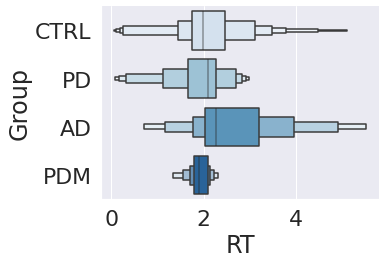

In [60]:
for i, title in enumerate(task):  
    
    nome = title
   
    controls = []
    parkinson=[]
    alz = []
    #ataxia = []
    others= []
    
    data = np.concatenate([control_all_feat[i], parkinson_all_feat[i], alzheimer_all_feat[i], others_all_feat[i]])
    data = data.tolist()
    data = [float(x) for x in data if x != "None"]


    [controls.append('CTRL') for value in range(len(control_all_feat[i]))]
    #[ataxia.append('ATX') for value in range(len(ataxia_all_feat[i]))]
    [parkinson.append('PD') for value in range(len(parkinson_all_feat[i]))]
    [alz.append('AD') for value in range(len(alzheimer_all_feat[i]))]
    [others.append('PDM') for value in range(len(others_all_feat[i]))]

    lista = controls+parkinson+alz+others
    
    dict = {nome: data, 'Group': lista} 
    df = pd.DataFrame(dict)
    #tips = pd.DataFrame()
    #tips['task'] = data
    #tips['lista'] = lista
    
    sns.set(font_scale=2)
    sns.catplot(x=nome, y="Group", kind="boxen", data=df, k_depth='full', palette="Blues",\
               height=4.2, aspect=1.4, showfliers = False)
    
    plt.savefig(f'/export/b14/afavaro/SLT_submission/Final_Plot/{nome}', facecolor='white', dpi=600)

### SEQUENCE TO PREVIOUS TWO

In [61]:
grouped = seq2prev2.groupby("label") #here we extract the values by category

control = grouped.get_group("CTRL") 


parkinson_ = grouped.get_group("PD")
alzheimer =  grouped.get_group("AD")
#ataxia =  grouped.get_group("ATX")


others =  pd.concat([ grouped.get_group('CBS'),  
                     grouped.get_group('ET'), grouped.get_group('GSS'), grouped.get_group('WD'), 
                      grouped.get_group('PSP'), grouped.get_group('MIM')])

#grouped.get_group('SCZ')

#grouped.get_group('SCZ')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [62]:
#stats.kruskal(ad_new, others_new).statistic

In [63]:
parkinson_ = parkinson_[~parkinson_.idx.str.contains("NLS_102")]
parkinson_ = parkinson_[~parkinson_.idx.str.contains("NLS_98")]
parkinson_ = parkinson_[~parkinson_.idx.str.contains("NLS_95")]
parkinson_ = parkinson_[~parkinson_.idx.str.contains("NLS_87")]
parkinson_ = parkinson_[~parkinson_.idx.str.contains("NLS_85")]
parkinson_ = parkinson_[~parkinson_.idx.str.contains("NLS_57")]
parkinson_ = parkinson_[~parkinson_.idx.str.contains("NLS_34")]
parkinson_ = parkinson_[~parkinson_.idx.str.contains("NLS_33")]
parkinson_ = parkinson_[~parkinson_.idx.str.contains("NLS_12")]
parkinson_ = parkinson_[~parkinson_.idx.str.contains("NLS_21")]



In [64]:
task = seq2prev2.columns[1:2].values.tolist()

alzheimer_all_feat = np.array([alzheimer[feat] for feat in np.array(seq2prev2.columns[1:2])])
others_all_feat = np.array([others[feat] for feat in np.array(seq2prev2.columns[1:2])])
parkinson_all_feat = np.array([parkinson_[feat] for feat in np.array(seq2prev2.columns[1:2])])
control_all_feat = np.array([control[feat] for feat in np.array(seq2prev2.columns[1:2])])


In [65]:
def kruskal(f, task, c, p, c_name, p_name):
    for i, title in enumerate(task):
        nome = title
        f.write(('\n'+ f'kruskal results for {title} {c_name} {p_name} {stats.kruskal(c[i], p[i]).pvalue} \n\n'))

with open('/export/b14/afavaro/SLT_submission/cognitive/results/s2prev2_ry_cn_vs_pd.txt', 'w') as f:
 
    kruskal(f, task, control_all_feat, parkinson_all_feat, "controls vs.", "parkinson")

    

with open('/export/b14/afavaro/SLT_submission/cognitive/results/s2prev2_ry_cn_vs_otr.txt', 'w') as f:
    
    
    kruskal(f, task, control_all_feat, others_all_feat, "control vs.", "others")
    

with open('/export/b14/afavaro/SLT_submission/cognitive/results/s2prev2_ry_pd_vs_otr.txt', 'w') as f:
    
    
    kruskal(f, task, parkinson_all_feat, others_all_feat, "parkinson vs.", "others")
    

with open('/export/b14/afavaro/SLT_submission/cognitive/results/s2prev2_ry_ad_vs_otr.txt', 'w') as f:

    
    kruskal(f, task, alzheimer_all_feat, others_all_feat, "alzheimers vs.", "others")
    

with open('/export/b14/afavaro/SLT_submission/cognitive/results/s2prev2_ry_ad_vs_cn.txt', 'w') as f:
    #final_sub
    
    kruskal(f, task, alzheimer_all_feat, control_all_feat, "alzheimers vs.", "controls")
    

with open('/export/b14/afavaro/SLT_submission/cognitive/results/s2prev2_ry_ad_vs_pd.txt', 'w') as f:
    #final_sub
    
    kruskal(f, task, alzheimer_all_feat, parkinson_all_feat, "alzheimers vs.", "parkinson")
    

    
    
    

In [83]:
kruskal_1 = read_stats_test('/export/b14/afavaro/SLT_submission/cognitive/results/s2prev2_ry_ad_vs_cn.txt')
krusk_1 = read_stats_test('/export/b14/afavaro/SLT_submission/cognitive/results/seq_2_prev_2_rt_ad_vs_cn.txt')
kruskal_2 = read_stats_test('/export/b14/afavaro/SLT_submission/cognitive/results/s2prev2_ry_ad_vs_otr.txt')
kruskal_3 = read_stats_test('/export/b14/afavaro/SLT_submission/cognitive/results/s2prev2_ry_ad_vs_pd.txt')
kruskal_4 = read_stats_test('/export/b14/afavaro/SLT_submission/cognitive/results/s2prev2_ry_cn_vs_otr.txt')
kruskal_5 = read_stats_test('/export/b14/afavaro/SLT_submission/cognitive/results/s2prev2_ry_cn_vs_pd.txt')
kruskal_6 = read_stats_test('/export/b14/afavaro/SLT_submission/cognitive/results/s2prev2_ry_pd_vs_otr.txt')
#best_krusk = compute_best_scores(kruskal)


In [85]:
holm_correction(kruskal_1+krusk_1)

(['kruskal results for Rhythm_std alzheimers vs. controls 0.015653845812883226 '],
 [0.04696153743864968])

In [68]:
holm_correction(kruskal_2)

([], [])

In [69]:
holm_correction(kruskal_3)

([], [])

In [70]:
holm_correction(kruskal_4)

([], [])

In [71]:
holm_correction(kruskal_5)

([], [])

In [72]:
holm_correction(kruskal_6)

([], [])

## WORD COLOR

In [73]:
grouped = word_color.groupby("label") #here we extract the values by category
control = grouped.get_group("CTRL") 

parkinson_ = grouped.get_group("PD")
alzheimer =  grouped.get_group("AD")
#ataxia =  grouped.get_group("ATX")


others =  pd.concat([ grouped.get_group('CBS'),  
                     grouped.get_group('ET'), grouped.get_group('GSS'), grouped.get_group('WD'), 
                      grouped.get_group('PSP'), grouped.get_group('MIM')])

#grouped.get_group('SCZ')

In [74]:
#alzheimer

In [75]:
task = word_color.columns[1:2].values.tolist()

alzheimer_all_feat = np.array([alzheimer[feat] for feat in np.array(word_color.columns[1:2])])
others_all_feat = np.array([others[feat] for feat in np.array(word_color.columns[1:2])])
parkinson_all_feat = np.array([parkinson_[feat] for feat in np.array(word_color.columns[1:2])])
control_all_feat = np.array([control[feat] for feat in np.array(word_color.columns[1:2])])
#ataxia_all_feat = np.array([ataxia[feat] for feat in np.array(word_color.columns[1:2])])


In [76]:
def kruskal(f, task, c, p, c_name, p_name):
    for i, title in enumerate(task):
        nome = title
        f.write(('\n'+ f'kruskal results for {title} {c_name} {p_name} {stats.kruskal(c[i], p[i]).pvalue} \n\n'))
        

with open('/export/b14/afavaro/SLT_submission/cognitive/results/wc_ry_cn_vs_pd.txt', 'w') as f:
 
    kruskal(f, task, control_all_feat, parkinson_all_feat, "controls vs.", "parkinson")

    

with open('/export/b14/afavaro/SLT_submission/cognitive/results/wc_ry_cn_vs_otr.txt', 'w') as f:
    
    
    kruskal(f, task, control_all_feat, others_all_feat, "control vs.", "others")
    

with open('/export/b14/afavaro/SLT_submission/cognitive/results/wc_ry_pd_vs_otr.txt', 'w') as f:
    
    
    kruskal(f, task, parkinson_all_feat, others_all_feat, "parkinson vs.", "others")
    

with open('/export/b14/afavaro/SLT_submission/cognitive/results/wc_ry_ad_vs_otr.txt', 'w') as f:

    
    kruskal(f, task, alzheimer_all_feat, others_all_feat, "alzheimers vs.", "others")
    

with open('/export/b14/afavaro/SLT_submission/cognitive/results/wc_ry_ad_vs_cn.txt', 'w') as f:
    #final_sub
    
    kruskal(f, task, alzheimer_all_feat, control_all_feat, "alzheimers vs.", "controls")
    

with open('/export/b14/afavaro/SLT_submission/cognitive/results/wc_ry_ad_vs_pd.txt', 'w') as f:
    #final_sub
    
    kruskal(f, task, alzheimer_all_feat, parkinson_all_feat, "alzheimers vs.", "parkinson")
    

    
    
    

In [77]:
kruskal_1 = read_stats_test('/export/b14/afavaro/SLT_submission/cognitive/results/wc_ry_ad_vs_cn.txt')
kruskal_2 = read_stats_test('/export/b14/afavaro/SLT_submission/cognitive/results/wc_ry_ad_vs_otr.txt')
kruskal_3 = read_stats_test('/export/b14/afavaro/SLT_submission/cognitive/results/wc_ry_ad_vs_pd.txt')
kruskal_4 = read_stats_test('/export/b14/afavaro/SLT_submission/cognitive/results/wc_ry_cn_vs_otr.txt')
kruskal_5 = read_stats_test('/export/b14/afavaro/SLT_submission/cognitive/results/wc_ry_cn_vs_pd.txt')
kruskal_6 = read_stats_test('/export/b14/afavaro/SLT_submission/cognitive/results/wc_ry_pd_vs_otr.txt')
#best_krusk = compute_best_scores(kruskal)


In [78]:
holm_correction(kruskal_1)

([], [])

In [79]:
holm_correction(kruskal_2)

([], [])

In [80]:
holm_correction(kruskal_3)

([], [])

In [81]:
holm_correction(kruskal_4)

([], [])

In [82]:
holm_correction(kruskal_5)

([], [])

In [119]:
holm_correction(kruskal_6)

([], [])

## RAINBOW PASSAGE



In [194]:
grouped = rainbow_pass.groupby("label") #here we extract the values by category

control = grouped.get_group("CTRL") 

parkinson_ = grouped.get_group("PD")
alzheimer =  grouped.get_group("AD")
#ataxia =  grouped.get_group("ATX")

others =  pd.concat([ grouped.get_group('CBS'), 
                     grouped.get_group('ET'), grouped.get_group('GSS'), grouped.get_group('WD')
                    ])



In [190]:
task = rainbow_pass.columns[1:2].values.tolist()

alzheimer_all_feat = np.array([alzheimer[feat] for feat in np.array(rainbow_pass.columns[1:2])])
others_all_feat = np.array([others[feat] for feat in np.array(rainbow_pass.columns[1:2])])
parkinson_all_feat = np.array([parkinson_[feat] for feat in np.array(rainbow_pass.columns[1:2])])
control_all_feat = np.array([control[feat] for feat in np.array(rainbow_pass.columns[1:2])])
ataxia_all_feat = np.array([ataxia[feat] for feat in np.array(rainbow_pass.columns[1:2])])


In [191]:
def kruskal(f, task, c, p, c_name, p_name):
    for i, title in enumerate(task):
        nome = title
        f.write(('\n'+ f'kruskal results for {title} {c_name} {p_name} {stats.kruskal(c[i], p[i]).pvalue} \n\n'))
        
with open('/export/b14/afavaro/SLT_submission/Reaction_Time/RP_RT_update.txt', 'w') as f:
    
    kruskal(f, task, control_all_feat, parkinson_all_feat, "controls vs.", "parkinson")
    
    kruskal(f, task, parkinson_all_feat, others_all_feat, "parkinson vs.", "others")

    kruskal(f, task, control_all_feat, others_all_feat, "controls vs.", "others")
    
    kruskal(f, task, alzheimer_all_feat, others_all_feat, "alzheimers vs.", "others")
    
    kruskal(f, task, alzheimer_all_feat, control_all_feat, "alzheimers vs.", "controls")
    
    kruskal(f, task, alzheimer_all_feat, parkinson_all_feat, "alzheimers vs.", "parkinson")
   # kruskal(f, task, ataxia_all_feat, others_all_feat, "ataxia vs.", "others")
    

In [192]:
kruskal = read_stats_test('/export/b14/afavaro/SLT_submission/Reaction_Time/RP_RT_update.txt')
best_krusk = compute_best_scores(kruskal)

In [193]:
best_krusk

[]

In [75]:
len(phon_cat_dict_keys())*[None]

NameError: name 'self' is not defined